---
# REPORT FOR HEAD OF DATA SCIENCE

This is a report for the Head of Data Science made by me, Marcela Martin Solon de Pontes.

In [1]:
# Necessary imports

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay

In [2]:
df = pd.read_csv("recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


## Data Validation

This data set has 947 rows and 8 columns. I have validated all variables and I have made some changes after validation. There were missing values on the columns "calories", "carbohydrate", "sugar", "protein" and the target "high_traffic". The changes and end results are as follows:

- **recipe**: numeric type without missing values, same as the description. No cleaning is needed. Since they are unique values, I made it into index.
- **calories**: numeric type with 52 missing values, I chose to replace the missing values with the mean by category.
- **carbohydrate**: numeric type with 52 missing values, I chose to replace the missing values with the mean by category.
- **sugar**: numeric type with 52 missing values, I chose to replace the missing values with the mean by category.
- **protein**: numeric type with 52 missing values, I chose to replace the missing values with the mean by category.
- **category**: character type of categories: "Chicken Breast", "Lunch/Snacks", "Beverages", "Potato", "Vegetable", "Meat", "Chicken", "Pork", "Dessert", "Breakfast" and "One Dish Meal". I renamed "Chicken Breast" to "Chicken" to have 10 types, as description.
- **servings**: character type with the following unique values: '6', '4', '1', '2', '4 as a snack', '6 as a snack'. I removed the strings "as a snack" and changed it to numeric type, resulting in 4 unique values (1, 2, 4, 6).
- **high_traffic**: character type with values "High" and NaN. I replaced the missing values with "Low".

In [3]:
# Validate the shape
df.shape

(947, 8)

In [4]:
# Validate the types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
# Validate missing values
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [6]:
# Validate recipe categories and duplicates
print(df[df.recipe.duplicated()])
print(f"Unique Values: {df.recipe.nunique()}")
print(df.recipe.nunique() == df.shape[0])

Empty DataFrame
Columns: [recipe, calories, carbohydrate, sugar, protein, category, servings, high_traffic]
Index: []
Unique Values: 947
True


In [7]:
# Set "recipe" as index
df.set_index("recipe", inplace=True)

In [8]:
# Validate 10 categories in category
df.category.unique()   # Chicken Breast

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [9]:
# Corrected category "Chicken Breast" to "Chicken"
df.loc[df["category"] == "Chicken Breast", "category"] = "Chicken"
df["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [10]:
# Validate and analyse missing values for calories, carbohydrate, sugar and protein - all for the same indexes/recipes
df[df.calories.isna()]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
24,NaN,NaN,NaN,NaN,Meat,2,NaN
49,NaN,NaN,NaN,NaN,Chicken,4,NaN
83,NaN,NaN,NaN,NaN,Meat,4,High
90,NaN,NaN,NaN,NaN,Pork,6,High
117,NaN,NaN,NaN,NaN,Chicken,6,High
122,NaN,NaN,NaN,NaN,Dessert,2,High
137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
150,NaN,NaN,NaN,NaN,Potato,2,High


In [11]:
# Explore patterns and outliers
df[["calories", "carbohydrate", "sugar", "protein"]].describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


In [12]:
# Analyse possible replacements for the missing values
df.groupby("category")[["calories", "carbohydrate", "sugar", "protein"]].mean()

,calories,carbohydrate,sugar,protein
category,,,,
Beverages,177.732174,15.955978,12.537283,0.594783
Breakfast,331.880000,39.711698,7.552264,16.957170
Chicken,551.511227,25.608344,5.344049,47.793865
Dessert,351.402078,55.661818,35.228442,5.759870
Lunch/Snacks,478.848537,42.820976,5.309146,19.610976
Meat,584.533784,22.159595,5.813649,40.377027
One Dish Meal,579.090000,50.383433,6.011642,35.926418
Pork,629.708082,28.076164,8.040137,43.797671
Potato,425.068554,58.150361,3.718916,8.574217


In [13]:
# Replace missing values with mean for each category
means = df.groupby("category")[["calories", "carbohydrate", "sugar", "protein"]].mean()

features_withna = ["calories", "carbohydrate", "sugar", "protein"]
categories = ["Lunch/Snacks", "Beverages", "Potato", "Vegetable", "Meat", "Chicken", "Pork", "Dessert", "Breakfast", "One Dish Meal"]

for cat in categories:
    for feature in features_withna:
        df.loc[(df[feature].isna()) & (df.category == cat), feature] = means.loc[cat, feature]

In [14]:
# Validate servings for wrong dtype
df.servings.unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [15]:
# Corrected servings inconsistencies and dtype
df["servings"] = df["servings"].str.strip(' as a snack')
df["servings"] = df["servings"].astype("int")
df["servings"].unique()

array([6, 4, 1, 2])

In [16]:
# Validate 2 categories for high_traffic
df["high_traffic"].unique()

array(['High', nan], dtype=object)

In [17]:
# Fixed missing values to "Low"
df.loc[df["high_traffic"].isna(), "high_traffic"] = "Low"
df["high_traffic"].unique()

array(['High', 'Low'], dtype=object)

In [18]:
# Final dataset
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,629.708082,28.076164,8.040137,43.797671,Pork,6,High
2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low


## Exploratory Analysis
I have investigated the target variable and features of the recipes, and the relationship between target variable and features.

I've notices an imbalance in the distribution of the target variable, and, although low overall, some correlations between features.

After the analysis, I've decided to apply the following changes to enable modeling:
- Category: label encoded for easier fit
- high_traffic: label encoded for easier fit

After visualization, I've decided to apply feature engineering, description below.

In [19]:
# Label Encoding of "category" and "high_traffic"
cat_encoded = {
    'Lunch/Snacks': 0,
    'Beverages': 1,
    'Potato': 2,
    'Vegetable': 3,
    'Meat': 4,
    'Chicken': 5,
    'Pork': 6,
    'Dessert': 7,
    'Breakfast': 8,
    'One Dish Meal': 9
}

df["category"].replace(cat_encoded, inplace=True)
df["high_traffic"].replace({"High": 1, "Low": 0}, inplace=True)

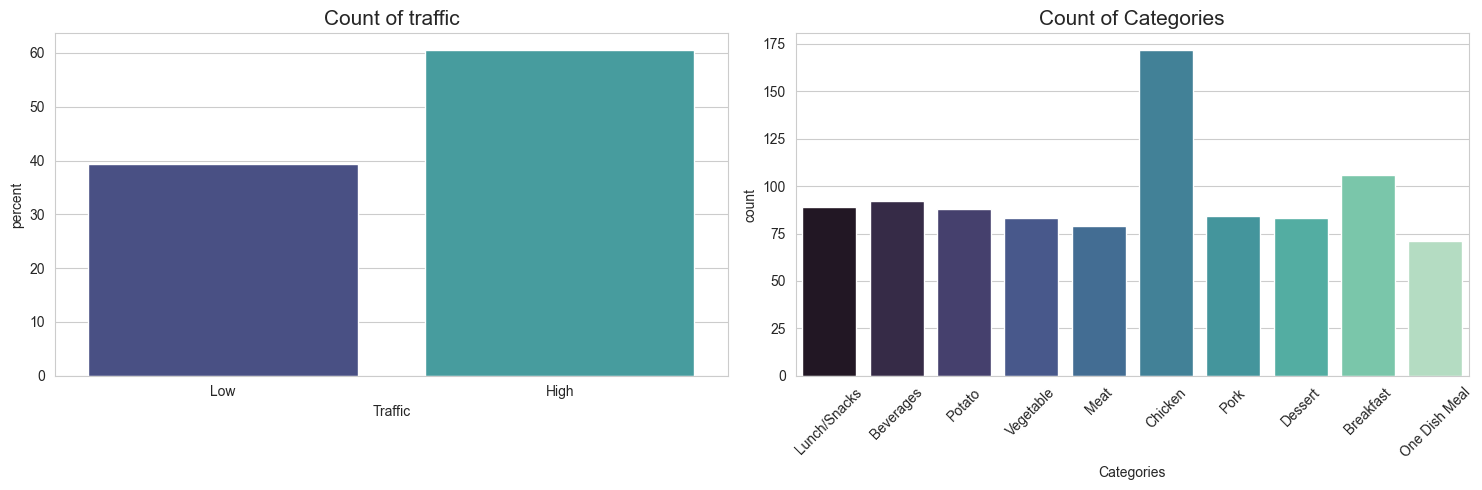

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(df, x="high_traffic", palette="mako", stat="percent", ax=axes[0])
axes[0].set_title("Count of traffic", fontsize=15)
axes[0].set_xticklabels(["Low", "High"])
axes[0].set_xlabel("Traffic")
# Visualization of the distribution of the target variable, noticing imbalances.

sns.countplot(data=df, x="category", palette="mako", ax=axes[1])
axes[1].set_title("Count of Categories", fontsize=15)
axes[1].set_xticklabels(categories)
axes[1].tick_params(axis="x", labelrotation=45)
axes[1].set_xlabel("Categories")
# Visualization of the distribution of the categories

plt.tight_layout()
plt.show();

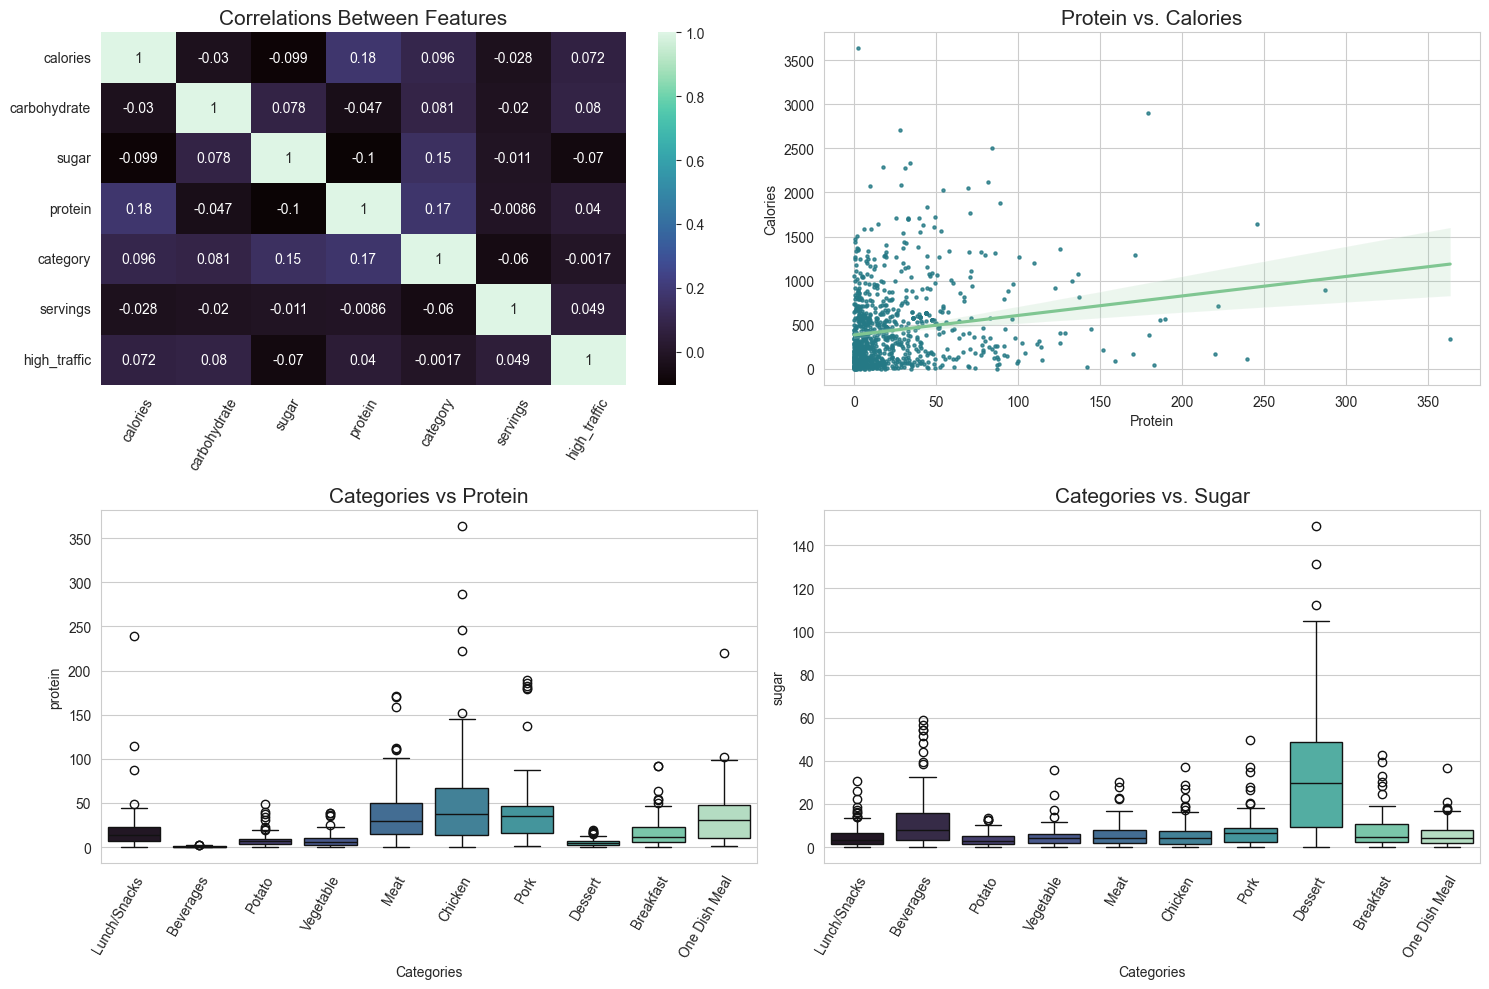

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, cmap="mako", ax=axes[0, 0])
axes[0, 0].set_title("Correlations Between Features", fontsize=15)
axes[0, 0].tick_params(axis="x", labelrotation=60)
# Low correlation overall, with a small highlight for "protein" vs "calories", "protein" vs "category", "sugar" vs "category".

sns.regplot(x=df["protein"], y=df["calories"], marker='.', scatter_kws=dict(color="#257985", s=20), line_kws={'color': '#80C692'}, ax=axes[0, 1])
axes[0, 1].set_title("Protein vs. Calories", fontsize=15)
axes[0, 1].set_xlabel("Protein")
axes[0, 1].set_ylabel("Calories")
# Visualization of the linear correlation between protein and calories (linear positive relationship)

sns.boxplot(x=df["category"], y=df["protein"], palette="mako", ax=axes[1, 0])
axes[1, 0].set_title("Categories vs Protein", fontsize=15)
axes[1, 0].set_xticklabels(categories, ha='right', rotation_mode='anchor')
axes[1, 0].tick_params(axis="x", labelrotation=60)
axes[1, 0].set_xlabel("Categories")
# Visualization of the distribution of Categories vs. Protein (higher in Chicken recipes, followed by Pork and Meat)

sns.boxplot(x=df["category"], y=df["sugar"], palette="mako", ax=axes[1, 1])
axes[1, 1].set_title("Categories vs. Sugar", fontsize=15)
axes[1, 1].set_xticklabels(categories, ha='right', rotation_mode='anchor')
axes[1, 1].tick_params(axis="x", labelrotation=60)
axes[1, 1].set_xlabel("Categories")
# Visualization of the distribution of Categories vs. Sugar (higher in Dessert recipes)

plt.tight_layout()
plt.show();

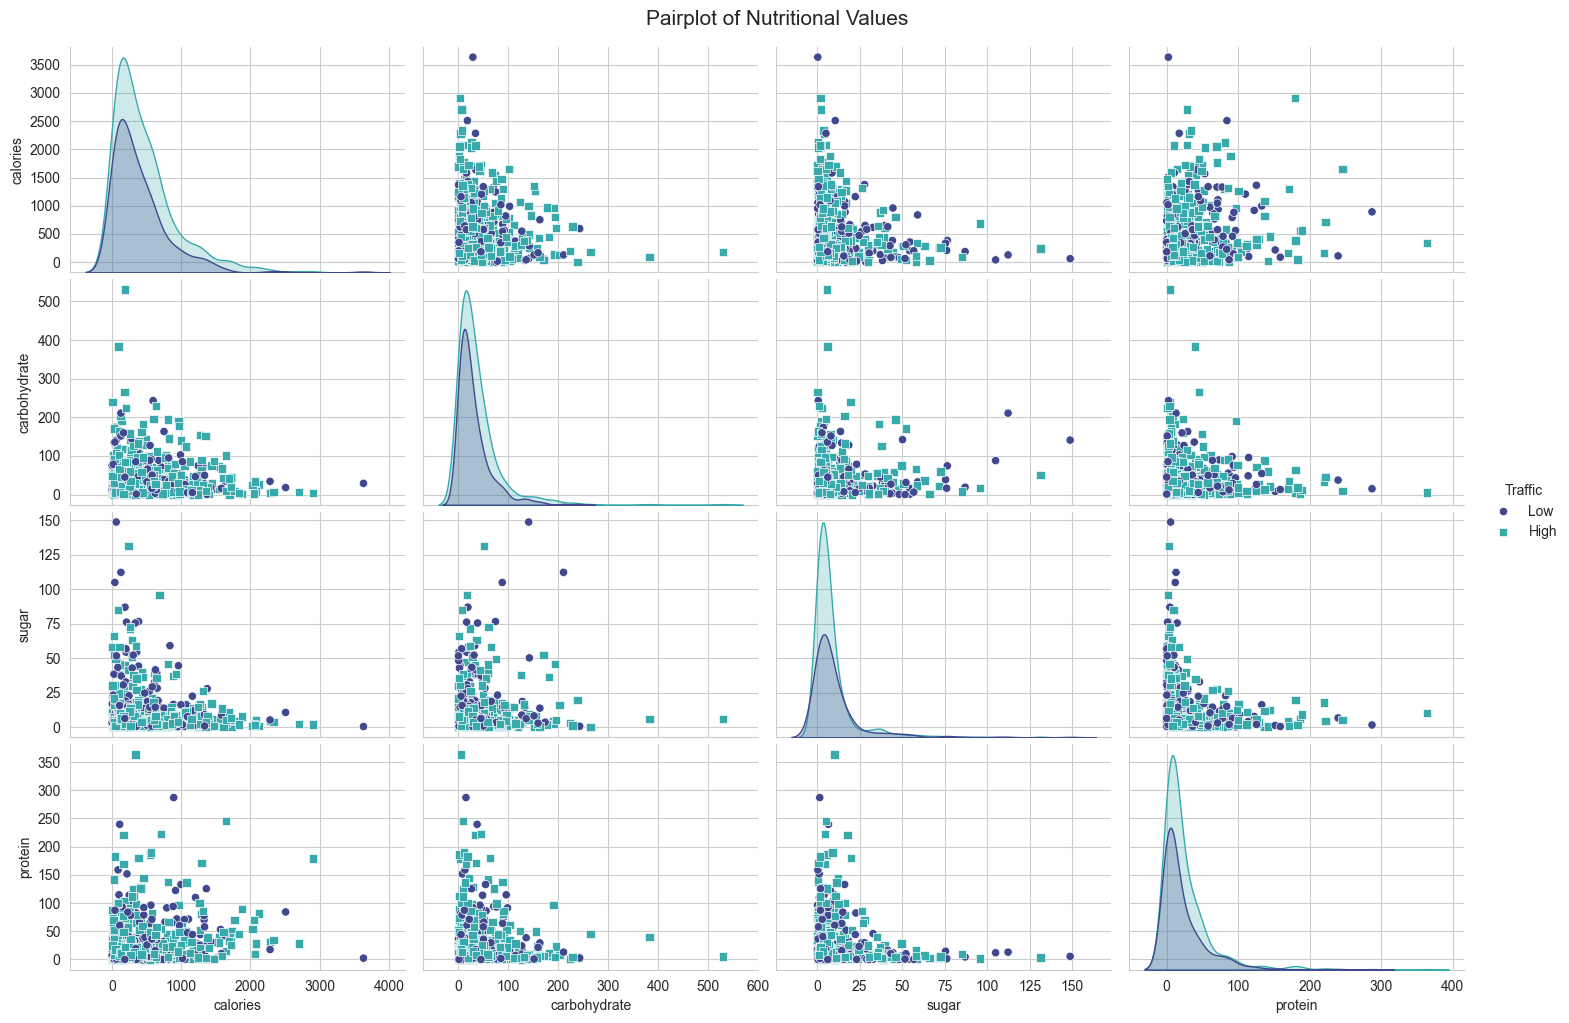

In [22]:
# Pairplot to better visualize correlation between groups
ax = sns.pairplot(data=df[["calories", "carbohydrate", "sugar", "protein", "high_traffic"]], hue="high_traffic", palette="mako", markers=["o", "s"], aspect=1.5)

ax._legend.set_title("Traffic")
ax.fig.suptitle("Pairplot of Nutritional Values", y=1.02, fontsize=15)

for t, l in zip(ax._legend.texts, ['Low', 'High']):
    t.set_text(l)

### Feature Engineering

- Created new features "mean", "std" and "skew" for all four nutritional values.
- Created new features "mean_cat", "std_cat" and "skew_cat" for all four nutritional values by its categories.

In [23]:
df["mean"] = df[["calories", "carbohydrate", "sugar", "protein"]].mean(axis=1)
df["std"] = df[["calories", "carbohydrate", "sugar", "protein"]].std(axis=1)
df["skew"] = df[["calories", "carbohydrate", "sugar", "protein"]].skew(axis=1)

In [24]:
means = df.groupby("category")[["calories", "carbohydrate", "sugar", "protein"]].mean()

for category in range(0, 10):
    df.loc[df["category"] == category, "mean_cat"] = means.loc[category].mean()
    df.loc[df["category"] == category, "std_cat"] = means.loc[category].std()
    df.loc[df["category"] == category, "skew_cat"] = means.loc[category].skew()

## Model Fitting & Training

Predict the traffic for "High" or "Low" is a binary categorical problem in machine learning.

I chose Logistic Regression model as base and, for the comparison model, I've chosen Decision Tree Classifier for better precision.

For the evaluation, I am choosing **Accuracy Score** with Classification Report for better interpretability, and **Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)** that better ilustrates a binary classifier system with the True Positive vs False Positive curve.

### Prepare Data for Modelling
To enable modelling, I chose all features, and "high_traffic" as the target variable. I also have made the following changes:
- Standardized the values with Power Transformer
- Split the data into a training set and a test set with train_test_split

In [25]:
X = df.drop("high_traffic", axis=1)
y = df["high_traffic"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
scaler = PowerTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
yhat_lr = lr.predict(X_test)
yhat_lr_proba = lr.predict_proba(X_test)[:, 1]

print(f"ROC_AUC: {roc_auc_score(y_test, yhat_lr_proba)}")
print(classification_report(y_test, yhat_lr))

ROC_AUC: 0.631304347826087
              precision    recall  f1-score   support

           0       0.53      0.47      0.50        75
           1       0.68      0.73      0.70       115

    accuracy                           0.63       190
   macro avg       0.60      0.60      0.60       190
weighted avg       0.62      0.63      0.62       190



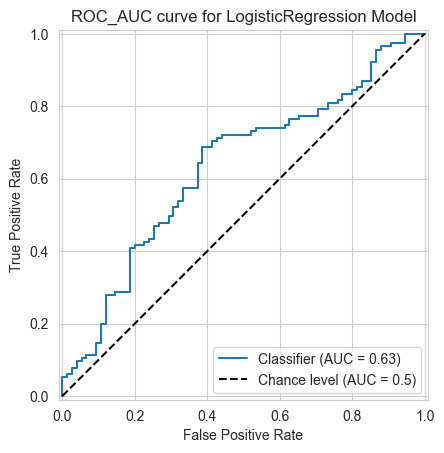

In [29]:
display = RocCurveDisplay.from_predictions(
    y_test,
    yhat_lr_proba,
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC_AUC curve for LogisticRegression Model",
)

### Decision Tree Classifier

In [30]:
for n in range(2, 6):
    
    dt = DecisionTreeClassifier(max_depth=n, random_state=42)
    dt.fit(X_train, y_train)
    yhat_dt = dt.predict(X_test)
    yhat_dt_proba = dt.predict_proba(X_test)[:, 1]
    
    print(f"ROC_AUC for {n}: {roc_auc_score(y_test, yhat_dt_proba)}")

ROC_AUC for 2: 0.7660869565217392
ROC_AUC for 3: 0.830608695652174
ROC_AUC for 4: 0.8515362318840579
ROC_AUC for 5: 0.792231884057971


In [31]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)
yhat_dt_proba = dt.predict_proba(X_test)[:, 1]

print(f"ROC_AUC: {roc_auc_score(y_test, yhat_dt_proba)}")
print(classification_report(y_test, yhat_dt))

ROC_AUC: 0.8515362318840579
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        75
           1       0.85      0.77      0.81       115

    accuracy                           0.78       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.79      0.78      0.78       190



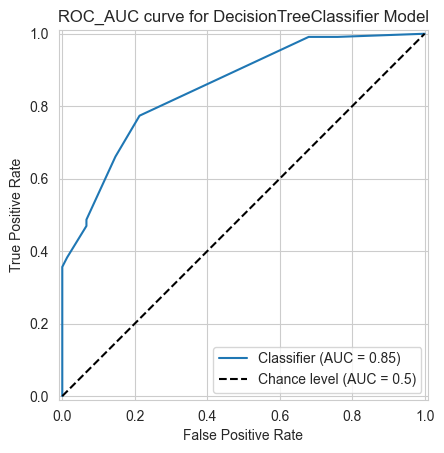

In [32]:
display = RocCurveDisplay.from_predictions(
    y_test,
    yhat_dt_proba,
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC_AUC curve for DecisionTreeClassifier Model",
)

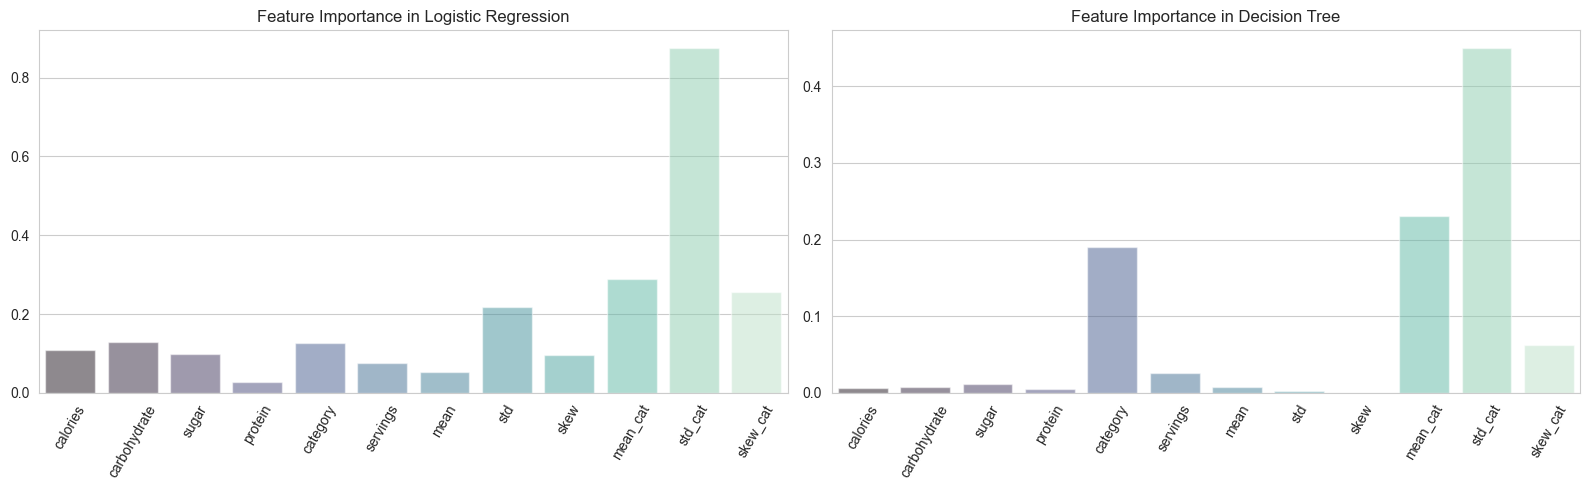

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

feature_cols = X.columns

resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = abs(lr.coef_[0][i])
    
sns.barplot(x=resultdict.keys(), y=resultdict.values(), alpha=0.5, palette="mako", ax=axes[0])
axes[0].tick_params(axis="x", labelrotation=60)
axes[0].set_title('Feature Importance in Logistic Regression')


resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = dt.feature_importances_[i]
    
sns.barplot(x=resultdict.keys(), y=resultdict.values(), alpha=0.5, palette="mako", ax=axes[1])
axes[1].tick_params(axis="x", labelrotation=60)
axes[1].set_title('Feature Importance in Decision Tree')

plt.tight_layout()
plt.show();

## Results
The ROC_AUC score of the Logistic Regression and Decision Tree Classifier is: 0.62 and 0.84, respectively, meaning the **Decision Tree Classifier Model fits the features better**.

Decision Tree Model also has a better F1 Score (0.81), indicating a better balance between Precision (85%) and Recall (77%), and an accuracy of 78%.

In [34]:
def calculate_traffic_increase(precision, num_weeks=1):
    """Calculates the average traffic increase based on given precision

    Parameters
    ----------
    precision : float
        The precision of the model
    num_weeks : int, optional
        Number of weeks to simulate (default is 1)

    Returns
    -------
    float
        A percentage of estimated traffic increase
    """

    traffic_increases = []
    for _ in range(num_weeks):
        for _ in [1, 2, 3, 4, 5, 6, 7]:
            dayly_traffic = np.random.choice([1.0, 1.4], size=7, p=[1 - precision, precision]).sum()
            traffic_increase = ((dayly_traffic / 7) - 1) * 100
            traffic_increases.append(traffic_increase)
    return traffic_increases, round(np.mean(traffic_increases), 2)

In [35]:
# Define precision for default and model
default_precision = 0.5
model_precision = 0.85
num_weeks = 100

# Calculate traffic increase for default and model
traffic_default = calculate_traffic_increase(default_precision, num_weeks)
traffic_model = calculate_traffic_increase(model_precision, num_weeks)

print(f"Traffic increase per Week for default method: {traffic_default[1]}%")
print(f"Traffic increase per Week for model: {traffic_model[1]}%")

Traffic increase per Week for default method: 20.24%
Traffic increase per Week for model: 33.75%


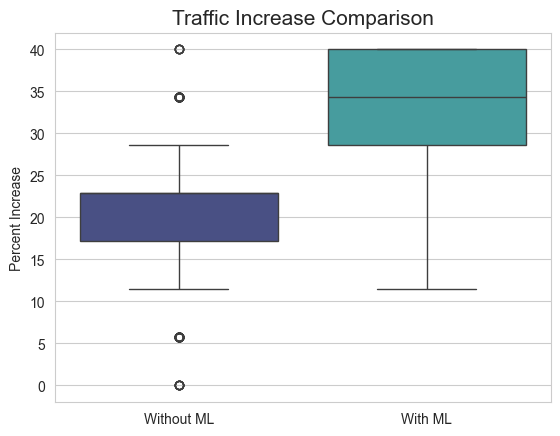

In [36]:
sns.boxplot({"Without ML": traffic_default[0], "With ML": traffic_model[0]}, palette="mako")
plt.title("Traffic Increase Comparison", fontsize=15)
plt.ylabel("Percent Increase");

## Recommendation 

The Product Team wants to achieve an 80% precision on achieving a higher traffic rate with the company's website. It is also important to note that it is beneficial to the company that we manage to also increase subscription to the Premium package.

Assuming we are guessing high popularity recipes correctly 50% of the time with the default method, and comparing with the model's precision, using the function above (<code>calculate_traffic_increase()</code>) we can assess the difference in estimated increase in traffic per week.

I recommend acquiring, together with the website traffic, the subcriptions rate. I don't recommend assuming that higher traffic means higher subscription rate.

I also recommend including other characteristics of each recipe into the dataset, such as recipe layout, complexity, number of steps, time to make and cost per serving, for example. It would be interesting to discuss layout strategies with the Marketing Team.

We could also plan to deploy an A/B test in order to compare this model with our default method, keeping Traffic as KPI to compare the two models each week.

It is important to keep the dataset up-to-date by continuously collecting more data, identifying and fixing errors that may occur, feature engineering and parameters tunning.